# Importing Libraries:

In [162]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Table of content:

[Data Cleaning](#Data-Cleaning:)

[Explatory Data Analysis](#Explatory-Data-Analysis:)

[Normalization](#Normalization:)

[Data Analysis](#Data-Analysis:)

[Data Visualization](#Data-Visualization:)

# Load Dataset:

In [164]:
data = pd.read_csv("/Users/Arsalan/Downloads/AusApparalSales4thQrt2020.csv")

# Explatory Data Analysis:

In [165]:
#view first 5 rows
data.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


# Column Information:

In [166]:
#view columns name
data.columns

Index(['Date', 'Time', 'State', 'Group', 'Unit', 'Sales'], dtype='object')

In [168]:
#view dimentions of dataset
data.shape

(7560, 6)

In [169]:
#Checking For datatypes of the attributes and counts non_null
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


**Data has categorical values , we have to convert them in numeric.**

In [170]:
#veiw data types
data.dtypes

Date     object
Time     object
State    object
Group    object
Unit      int64
Sales     int64
dtype: object

# Data Cleaning:

In [171]:
#check for missing value
data.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [172]:
data.notna().sum()

Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64

**There isn't any null value in dataset**

**Date column convert into year, month,week,day,Quarter**

In [173]:
data['Date']= pd.to_datetime(data['Date'])
data['Year']= data['Date'].dt.year
data['Month']= data['Date'].dt.month
data['Week']= data['Date'].dt.isocalendar().week
data['Quarter']=data['Date'].dt.quarter
data['Day']=data['Date'].dt.day

data

,Date,Time,State,Group,Unit,Sales,Year,Month,Week,Quarter,Day
0,2020-10-01,Morning,WA,Kids,8,20000,2020,10,40,4,1
1,2020-10-01,Morning,WA,Men,8,20000,2020,10,40,4,1
2,2020-10-01,Morning,WA,Women,4,10000,2020,10,40,4,1
3,2020-10-01,Morning,WA,Seniors,15,37500,2020,10,40,4,1
4,2020-10-01,Afternoon,WA,Kids,3,7500,2020,10,40,4,1
...,...,...,...,...,...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000,2020,12,53,4,30
7556,2020-12-30,Evening,TAS,Kids,15,37500,2020,12,53,4,30
7557,2020-12-30,Evening,TAS,Men,15,37500,2020,12,53,4,30
7558,2020-12-30,Evening,TAS,Women,11,27500,2020,12,53,4,30


**We have to convert categorical values into int**

**Note**

 1: It shows True
 
 0: It shows False

In [177]:
df = pd.get_dummies(data)

In [178]:
df.head()

,Date,Unit,Sales,Year,Month,Week,Quarter,Day,Time_ Afternoon,Time_ Evening,...,State_ NT,State_ QLD,State_ SA,State_ TAS,State_ VIC,State_ WA,Group_ Kids,Group_ Men,Group_ Seniors,Group_ Women
0,2020-10-01,8,20000,2020,10,40,4,1,0,0,...,0,0,0,0,0,1,1,0,0,0
1,2020-10-01,8,20000,2020,10,40,4,1,0,0,...,0,0,0,0,0,1,0,1,0,0
2,2020-10-01,4,10000,2020,10,40,4,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,2020-10-01,15,37500,2020,10,40,4,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,2020-10-01,3,7500,2020,10,40,4,1,1,0,...,0,0,0,0,0,1,1,0,0,0


**Data type of Date column is datetime , so we have to change it into int**

In [179]:
from sklearn import ensemble
from sklearn import preprocessing

In [182]:
#Label encoder to convert categorical value into int
leModel = preprocessing.LabelEncoder()
df['Date']= leModel.fit_transform(df['Date'])
leModel = preprocessing.LabelEncoder()

In [183]:
#veiw data type
df.dtypes

Date                int64
Unit                int64
Sales               int64
Year                int64
Month               int64
Week               UInt32
Quarter             int64
Day                 int64
Time_ Afternoon     uint8
Time_ Evening       uint8
Time_ Morning       uint8
State_ NSW          uint8
State_ NT           uint8
State_ QLD          uint8
State_ SA           uint8
State_ TAS          uint8
State_ VIC          uint8
State_ WA           uint8
Group_ Kids         uint8
Group_ Men          uint8
Group_ Seniors      uint8
Group_ Women        uint8
dtype: object

# Normalization:

Machine Learning algorithms use feature scaling to improve the performance, some of the scaling techniques are: normalization and standardization.

**MinMax Scaler**

There is another way of data scaling, where the minimum of feature is made equal to zero and the maximum of feature equal to one. MinMax Scaler shrinks the data within the given range, usually of 0 to 1. It transforms data by scaling features to a given range. It scales the values to a specific value range without changing the shape of the original distribution.

In [185]:
#Normalization 
scaler = MinMaxScaler()
scaler.fit(df)
normalized_data = scaler.transform(df)
print(normalized_data)

[[0.         0.0952381  0.0952381  ... 0.         0.         0.        ]
 [0.         0.0952381  0.0952381  ... 1.         0.         0.        ]
 [0.         0.03174603 0.03174603 ... 0.         0.         1.        ]
 ...
 [1.         0.20634921 0.20634921 ... 1.         0.         0.        ]
 [1.         0.14285714 0.14285714 ... 0.         0.         1.        ]
 [1.         0.17460317 0.17460317 ... 0.         1.         0.        ]]


In [186]:
normalized_data

array([[0.        , 0.0952381 , 0.0952381 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.0952381 , 0.0952381 , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.03174603, 0.03174603, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 0.20634921, 0.20634921, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.14285714, 0.14285714, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.17460317, 0.17460317, ..., 0.        , 1.        ,
        0.        ]])

**Mean and Standard Deviation**

In [187]:
#Mean and standard deviation
print(np.mean(normalized_data))
print(np.std(normalized_data))

0.25021317600682685
0.38482481895715737


**Now Data is ready for Analysis and Visualization**

**Splitting data into Groups**

Splitting is a process in which we split data into a group by applying some conditions on datasets. In order to split the data, we apply certain conditions on datasets. In order to split the data, we use groupby() function this function is used to split the data into groups based on some criteria.

**Here, we can apply a group on multiple columns and calculate a sum over each combination group.**

In [188]:
#Group to columns sales and unit
df.groupby(['Sales', 'Unit'])
 
print(df.groupby(['Sales', 'Unit']).sum())

              Date    Year  Month   Week  Quarter   Day  Time_ Afternoon  \
Sales  Unit                                                                
5000   2      5626  262600   1430   6024      520  1856               44   
7500   3      7760  484800   2547  10732      960  3590               84   
10000  4      7136  424200   2236   9444      840  3266               71   
12500  5     14834  668620   3639  15388     1324  5295              108   
15000  6     16369  747400   4063  17176     1480  5849              132   
...            ...     ...    ...    ...      ...   ...              ...   
152500 61      664   18180    108    457       36   133                3   
155000 62      758   20200    120    511       40   168                6   
157500 63      942   26260    156    657       52   175                6   
160000 64      972   26260    156    662       52   205                1   
162500 65      856   22220    132    565       44   207                4   

           

In [189]:
#Group to sales and year
df.groupby(['Sales', 'Year'])
 
print(df.groupby(['Sales', 'Year']).sum())

              Date  Unit  Month   Week  Quarter   Day  Time_ Afternoon  \
Sales  Year                                                              
5000   2020   5626   260   1430   6024      520  1856               44   
7500   2020   7760   720   2547  10732      960  3590               84   
10000  2020   7136   840   2236   9444      840  3266               71   
12500  2020  14834  1655   3639  15388     1324  5295              108   
15000  2020  16369  2220   4063  17176     1480  5849              132   
...            ...   ...    ...    ...      ...   ...              ...   
152500 2020    664   549    108    457       36   133                3   
155000 2020    758   620    120    511       40   168                6   
157500 2020    942   819    156    657       52   175                6   
160000 2020    972   832    156    662       52   205                1   
162500 2020    856   715    132    565       44   207                4   

             Time_ Evening  Time_ Mor

**Aggregation**

Aggregation is a process in which we compute a summary statistic about each group.

**We can apply a multiple functions at once by passing a list or dictionary of functions to do aggregation with, outputting a DataFrame.** 

In [190]:
#Group sales with sum,mean std of Unit
grp = df.groupby('Sales')
 
grp['Unit'].agg([np.sum, np.mean, np.std])

,sum,mean,std
Sales,,,
5000,260,2.0,0.0
7500,720,3.0,0.0
10000,840,4.0,0.0
12500,1655,5.0,0.0
15000,2220,6.0,0.0
...,...,...,...
152500,549,61.0,0.0
155000,620,62.0,0.0
157500,819,63.0,0.0


**Filtration:**

Filtration is a process in which we discard some groups, according to a group-wise computation that evaluates True or False.

**Now we filter data that to return the Unit which comes more than 2.**

In [191]:
#Filter unit values 
grp = df.groupby('Unit')
grp.filter(lambda x: len(x) >= 2)

,Date,Unit,Sales,Year,Month,Week,Quarter,Day,Time_ Afternoon,Time_ Evening,...,State_ NT,State_ QLD,State_ SA,State_ TAS,State_ VIC,State_ WA,Group_ Kids,Group_ Men,Group_ Seniors,Group_ Women
0,0,8,20000,2020,10,40,4,1,0,0,...,0,0,0,0,0,1,1,0,0,0
1,0,8,20000,2020,10,40,4,1,0,0,...,0,0,0,0,0,1,0,1,0,0
2,0,4,10000,2020,10,40,4,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,15,37500,2020,10,40,4,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,3,7500,2020,10,40,4,1,1,0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7555,89,14,35000,2020,12,53,4,30,1,0,...,0,0,0,1,0,0,0,0,1,0
7556,89,15,37500,2020,12,53,4,30,0,1,...,0,0,0,1,0,0,1,0,0,0
7557,89,15,37500,2020,12,53,4,30,0,1,...,0,0,0,1,0,0,0,1,0,0
7558,89,11,27500,2020,12,53,4,30,0,1,...,0,0,0,1,0,0,0,0,0,1


# Data Analysis:

**Descriptive statistical analysis**

In [141]:
#descriptive statistical analysis
d = pd.DataFrame(df, columns = ['Sales', 'Unit']).describe()

In [192]:
print(d)

               Sales         Unit
count    7560.000000  7560.000000
mean    45013.558201    18.005423
std     32253.506944    12.901403
min      5000.000000     2.000000
25%     20000.000000     8.000000
50%     35000.000000    14.000000
75%     65000.000000    26.000000
max    162500.000000    65.000000


**Visualization of descriptive statistical analysis for Sales and Unit**

C:\Users\Arsalan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


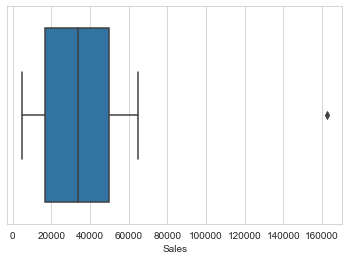

C:\Users\Arsalan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


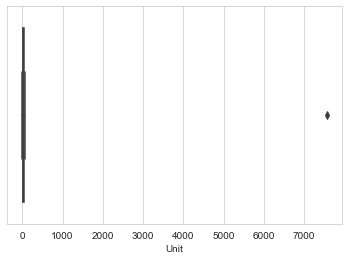

In [193]:
#descriptive statistical analysis for Sales and Unit
for i in d.describe().columns:
  sns.boxplot(d[i].dropna())
  plt.show()
     

**Determine which group is generating the highest sales, and which group 
is generating the lowest sales.**

Group
 Kids       AxesSubplot(0.125,0.125;0.775x0.755)
 Men        AxesSubplot(0.125,0.125;0.775x0.755)
 Seniors    AxesSubplot(0.125,0.125;0.775x0.755)
 Women      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Sales, dtype: object

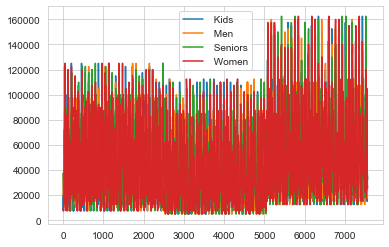

In [194]:
#Highest and Lowest sales group-wise
data.groupby('Group')['Sales'].plot(legend=True)

**Determine which state is generating the highest sales, and which state is 
generating the lowest sales.**

State
 NSW    AxesSubplot(0.125,0.125;0.775x0.755)
 NT     AxesSubplot(0.125,0.125;0.775x0.755)
 QLD    AxesSubplot(0.125,0.125;0.775x0.755)
 SA     AxesSubplot(0.125,0.125;0.775x0.755)
 TAS    AxesSubplot(0.125,0.125;0.775x0.755)
 VIC    AxesSubplot(0.125,0.125;0.775x0.755)
 WA     AxesSubplot(0.125,0.125;0.775x0.755)
Name: Sales, dtype: object

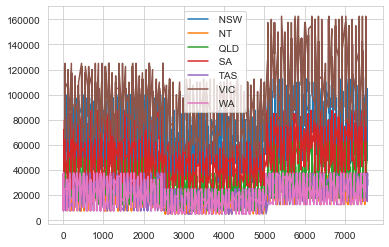

In [195]:
#Highest and Lowest sales state-wise
data.groupby('State')['Sales'].plot(legend=True)

**Generate weekly, monthly and quarterly reports for the analysis made**

<AxesSubplot:xlabel='Sales'>

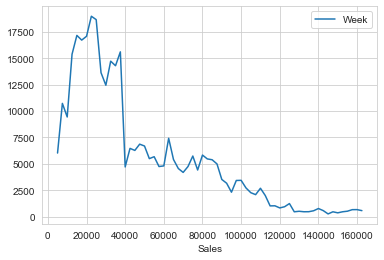

In [196]:
#Sales Weekly Report
df.groupby(['Sales']).sum().plot(kind='line', y='Week')

<AxesSubplot:xlabel='Sales'>

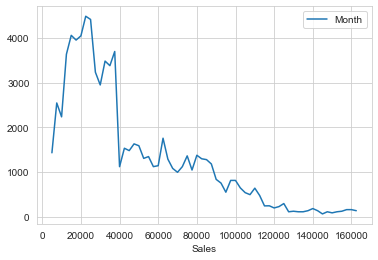

In [197]:
#Sales Monthly report
df.groupby(['Sales']).sum().plot(kind='line', y='Month')

<AxesSubplot:xlabel='Sales'>

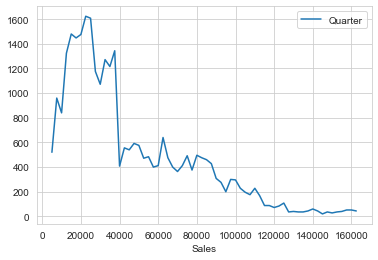

In [198]:
#Sales Quarterly Report
df.groupby(['Sales']).sum().plot(kind='line', y='Quarter')

# Data Visualization:

**Dashboard for Head of S&M**

In [149]:
import seaborn as sns

1. State-wise sales analysis for different groups (kids, women, men, and seniors)
2. Group-wise sales analysis (kids, women, men, and seniors) across different states
3. Time-of-the-day analysis: during which time of the day are sales the highest, and during which time are sales the lowest?
4. Monthly Sales chart
5. Daily Sales Chart
6. Quarterly Sales Chart

<AxesSubplot:xlabel='Sales', ylabel='Quarter'>

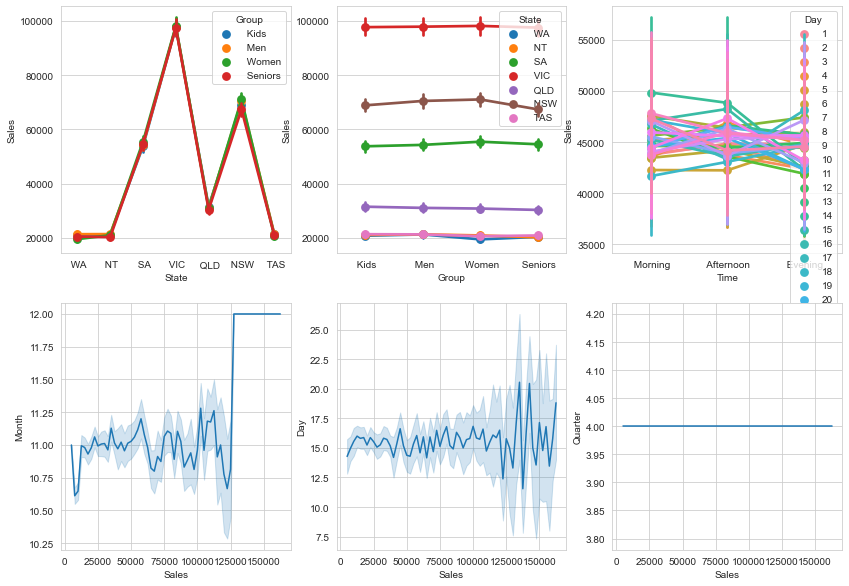

In [200]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.pointplot(data=data, x="State", y="Sales", hue="Group")
plt.subplot(2,3,2)
sns.pointplot(data=data, x="Group", y="Sales", hue="State")
plt.subplot(2,3,3)
sns.pointplot(data=data, x="Time", y="Sales", hue="Day")
plt.subplot(2,3,4)
sns.lineplot(data=data, x="Sales", y="Month")
plt.subplot(2,3,5)
sns.lineplot(data=data, x="Sales", y="Day")
plt.subplot(2,3,6)
sns.lineplot(data=data, x="Sales", y="Quarter")
